In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(".\dataset\Cleanned_data.csv")
df.head()

,location,BHK,sqft,price
0,1st Block Jayanagar,4,2850.0,428.0
1,1st Block Jayanagar,3,1630.0,194.0
2,1st Block Jayanagar,6,1200.0,125.0
3,1st Block Jayanagar,3,1875.0,235.0
4,1st Block Jayanagar,3,930.0,85.0


In [9]:
location_value = list(df['location'].unique())

In [248]:
data = df
location = pd.get_dummies(data.location)
data = pd.concat([data,location],axis='columns')

In [249]:
data.shape

(8625, 244)

In [250]:
data1 = data.drop('location',axis = 1)
data1.reset_index(drop = True)
x=data1.drop("price",axis=1)
y=data1["price"]

In [251]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=10)
linear = LinearRegression()
linear.fit(x_train,y_train)
pred = linear.predict(x_test)
r2_score(y_test,pred)

0.827442920868495

In [254]:
loc = 0
dumLoc = [1 if loc == x else 0 for x in range(240)]
val = [3,1630]
val.extend(dumLoc)
test = np.array([val])
result = linear.predict(test)
r = int(round(result[0],0))
print(r)
print(r*val[1])

223
363490


In [255]:
import joblib
joblib.dump(linear,"house_price.ml")

['house_price.ml']

Text(0.5, 1.0, 'Scattered plot of price vs sq.ft')

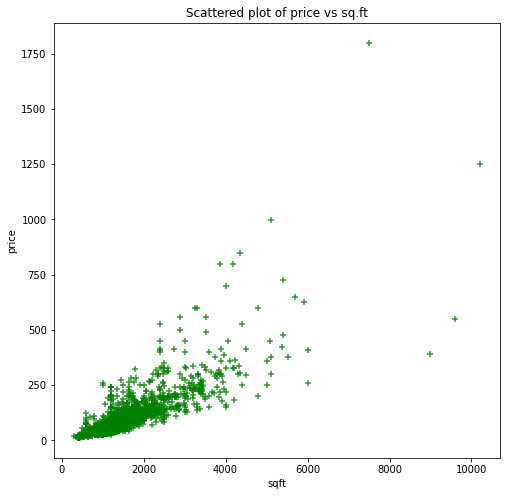

In [256]:
plot = "sqft"
plt.figure(figsize=(8, 8))
sns.regplot(x_test[plot],y_test,fit_reg=False,marker="+",color="g")
plt.title("Scattered plot of price vs sq.ft")

Text(0.5, 1.0, 'Liner regression fit to dataset according to sq.ft')

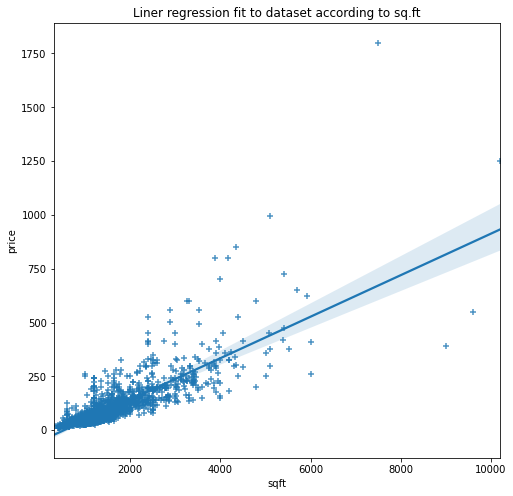

In [257]:
plot="sqft"
plt.figure(figsize=(8, 8))
sns.regplot(x_test[plot],y_test,fit_reg=True,marker="+")
plt.title("Liner regression fit to dataset according to sq.ft")

Text(0.5, 1.0, 'Liner regression fit to dataset according to sq.ft')

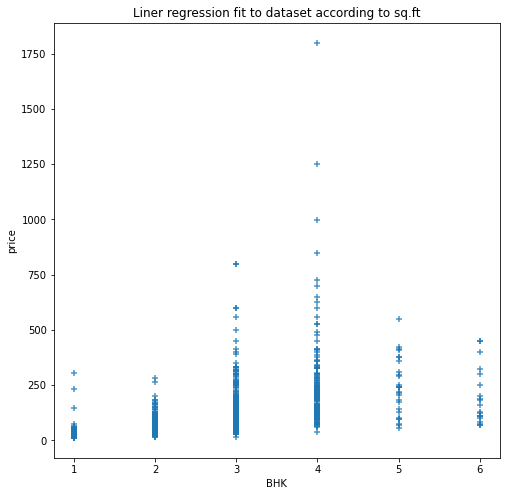

In [258]:
plot="BHK"
plt.figure(figsize=(8, 8))
sns.regplot(x_test[plot],y_test,fit_reg=False,marker="+")
plt.title("Liner regression fit to dataset according to sq.ft")
